# This file represents the Key Exploratory Data Analysis of our dataset.

### WARNING - please place the file in the same directory as the dataset csv file

##### Necessary Inputs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import calendar


In [2]:
data = pd.read_csv('Products_Information.csv')
with pd.option_context('float_format', '{:f}'.format):
    display(data.describe())

print('Median of sales column:', data['sales'].median())
print('Mean of sales column:', data['sales'].mean())


,id,store_nbr,sales,special_offer
count,3000888.000000,3000888.000000,3000888.000000,3000888.000000
mean,1500443.500000,27.500000,357.775749,2.602770
std,866281.891642,15.585787,1101.997721,12.218882
min,0.000000,1.000000,0.000000,0.000000
25%,750221.750000,14.000000,0.000000,0.000000
50%,1500443.500000,27.500000,11.000000,0.000000
75%,2250665.250000,41.000000,195.847250,0.000000
max,3000887.000000,54.000000,124717.000000,741.000000


Median of sales column: 11.0
Mean of sales column: 357.77574911261894


In [3]:
data = data[pd.to_datetime(data['date']).dt.year >= 2016]

print('Median of sales column:', data['sales'].median())
print('Mean of sales column:', data['sales'].mean())
num_rows_2016_onwards = data[pd.to_datetime(data['date']).dt.year >= 2016].shape[0]
print('Number of rows in the dataframe from 2016 onwards:', num_rows_2016_onwards)



Median of sales column: 24.0
Mean of sales column: 457.72248700136413
Number of rows in the dataframe from 2016 onwards: 1054944


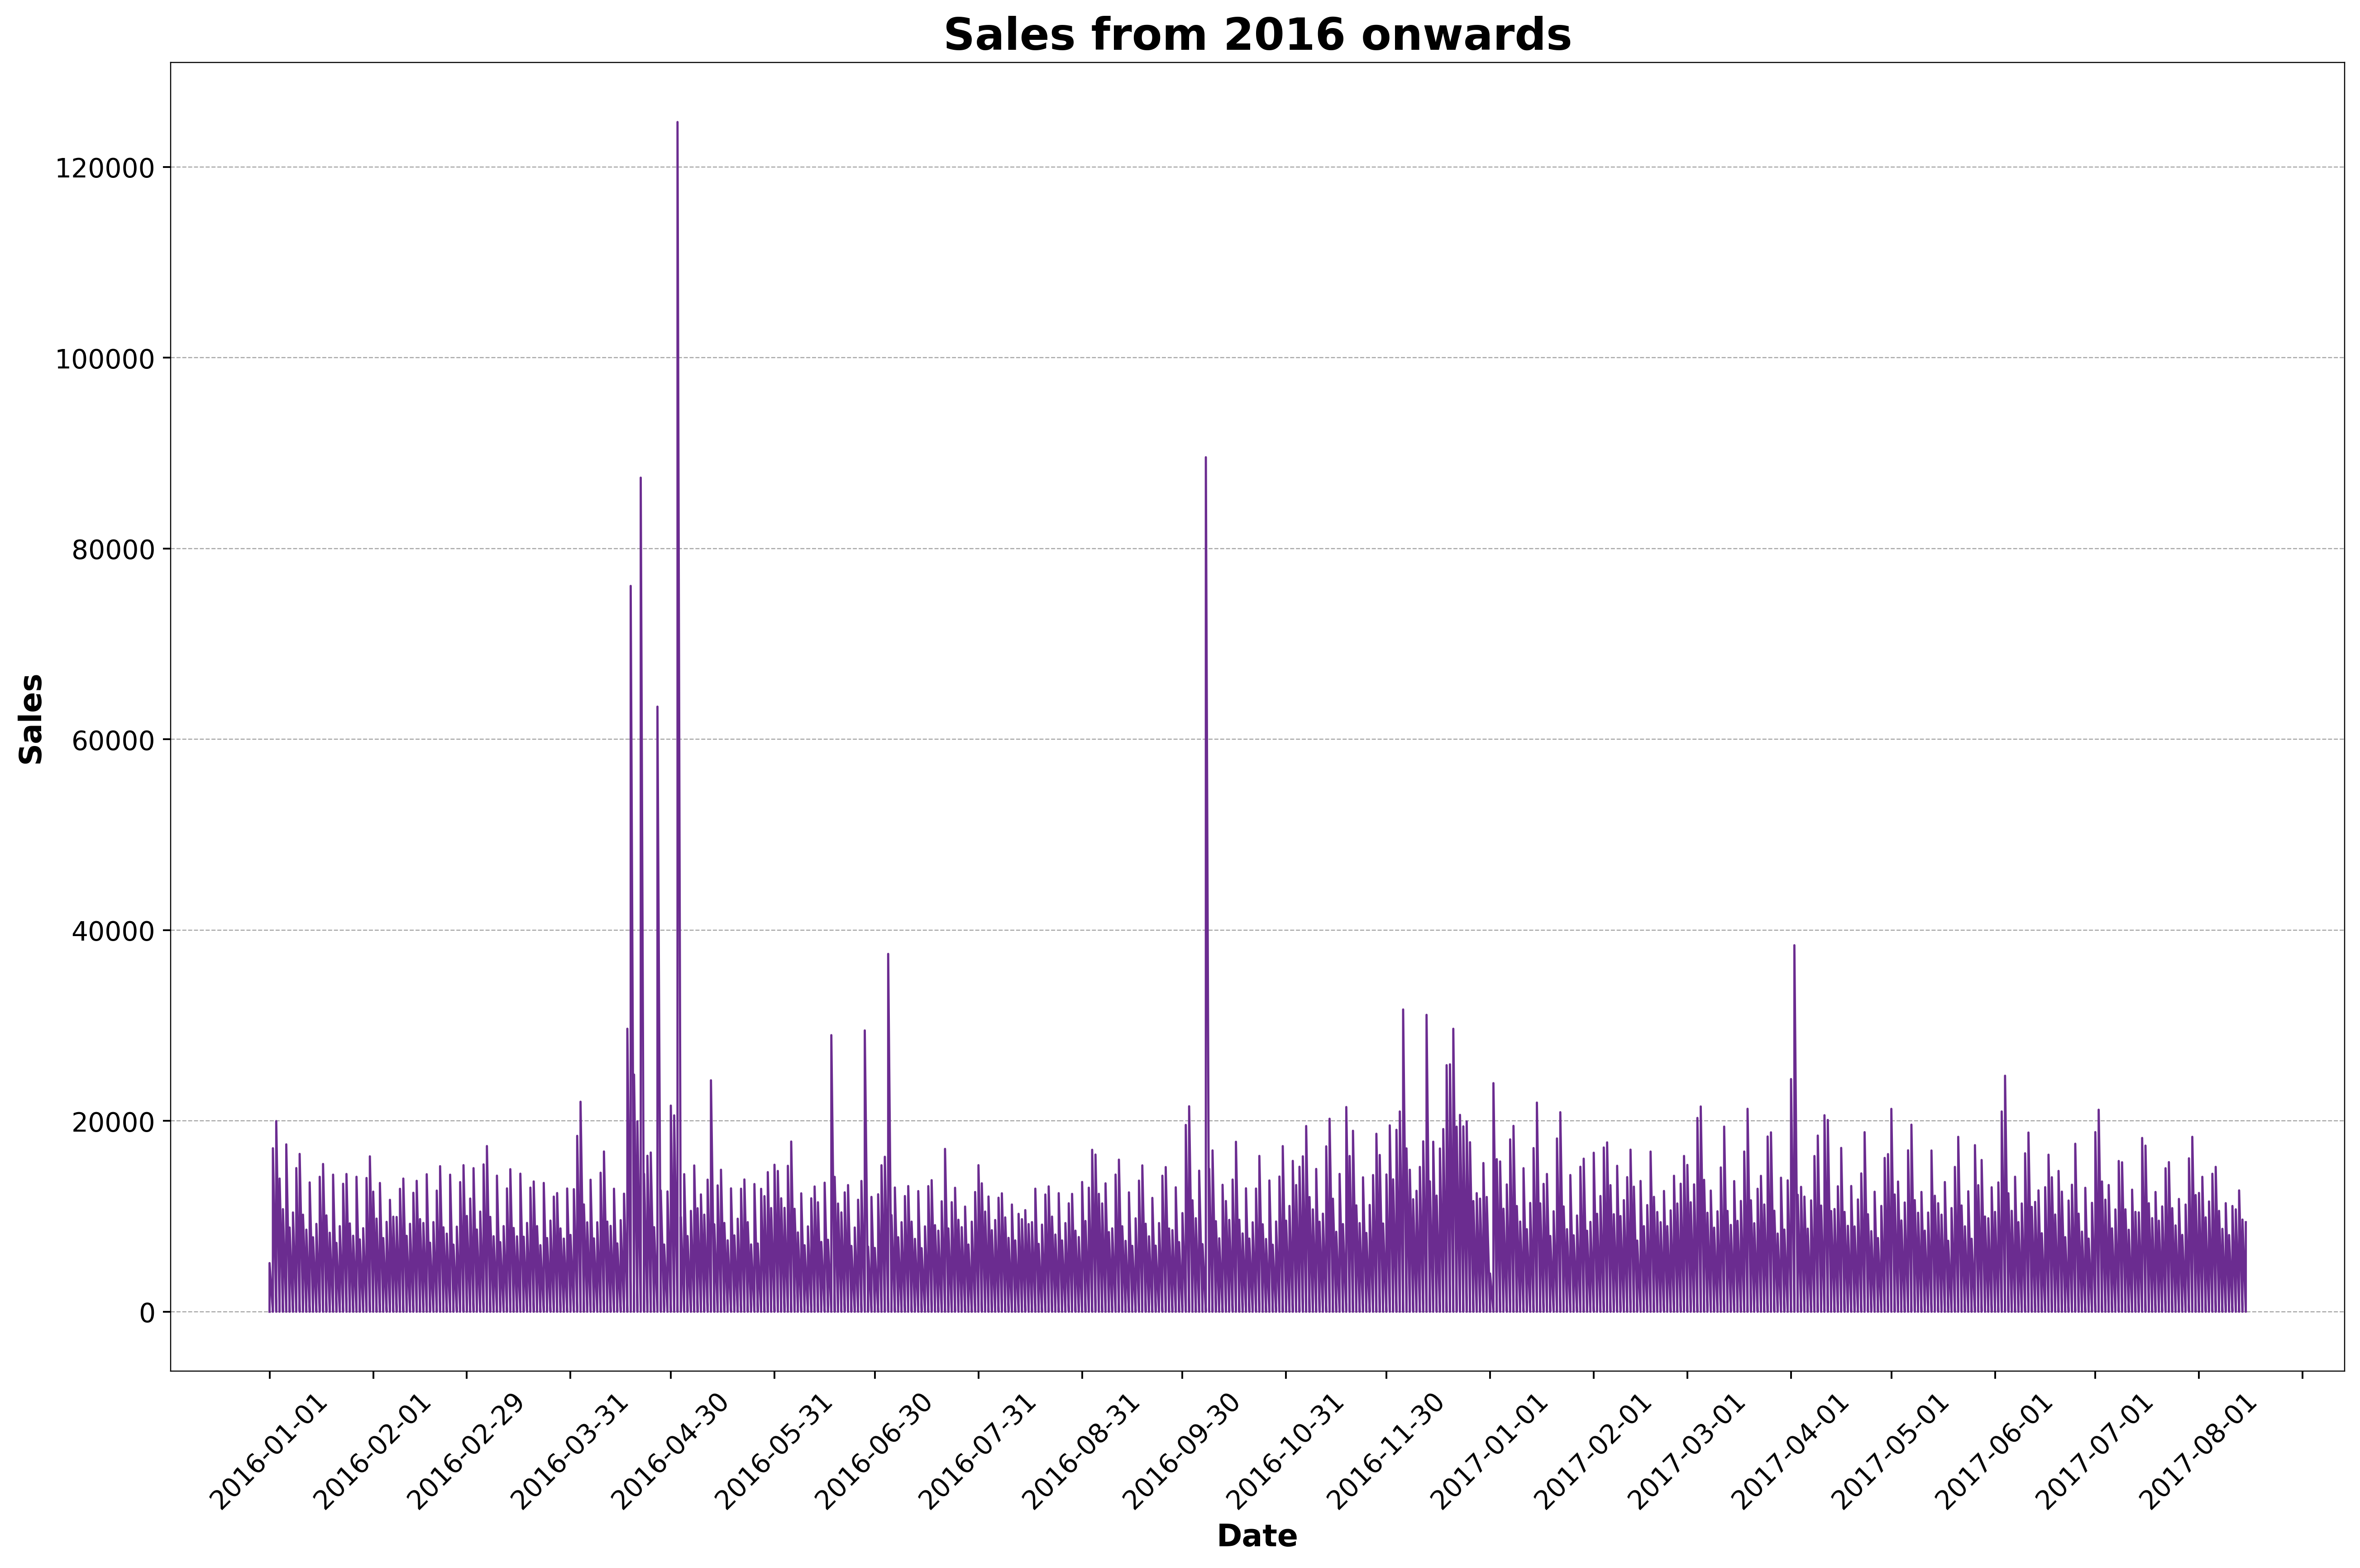

In [4]:
plt.figure(figsize=(15, 10), dpi=350)

sns.lineplot(x='date', y='sales', data=data, color='#6b2c90', linewidth=1, estimator = None)
sns.despine()


plt.title('Sales from 2016 onwards', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Sales', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='light', rotation=45)  #
plt.yticks(fontsize=12, fontweight='light')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  

plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='y', alpha=0.7, zorder=0)  
plt.ticklabel_format(style='plain', axis='y')

plt.gca().set_axisbelow(True)
spine_linewidth = 0.5  
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(spine_linewidth)

plt.tight_layout()
plt.show()

In [5]:
# getting data for monethly sales by store
data['year'] = pd.to_datetime(data['date']).dt.year
data['month'] = pd.to_datetime(data['date']).dt.month

data['year_month'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))

monthly_sales = data.groupby('year_month')['sales'].mean().reset_index()

monthly_store_sales = data.groupby(['year_month', 'store_nbr'])['sales'].mean().reset_index()

print(monthly_sales.dtypes)
print(monthly_store_sales.dtypes)
monthly_sales.head()
monthly_store_sales.head()



year_month    datetime64[ns]
sales                float64
dtype: object
year_month    datetime64[ns]
store_nbr              int64
sales                float64
dtype: object


,year_month,store_nbr,sales
0,2016-01-01,1,306.645648
1,2016-01-01,2,472.592626
2,2016-01-01,3,1152.004284
3,2016-01-01,4,426.130256
4,2016-01-01,5,294.821660


In [6]:
data = data[~((data['date'] >= '2017-07-31') & (data['date'] <= '2017-08-15'))]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


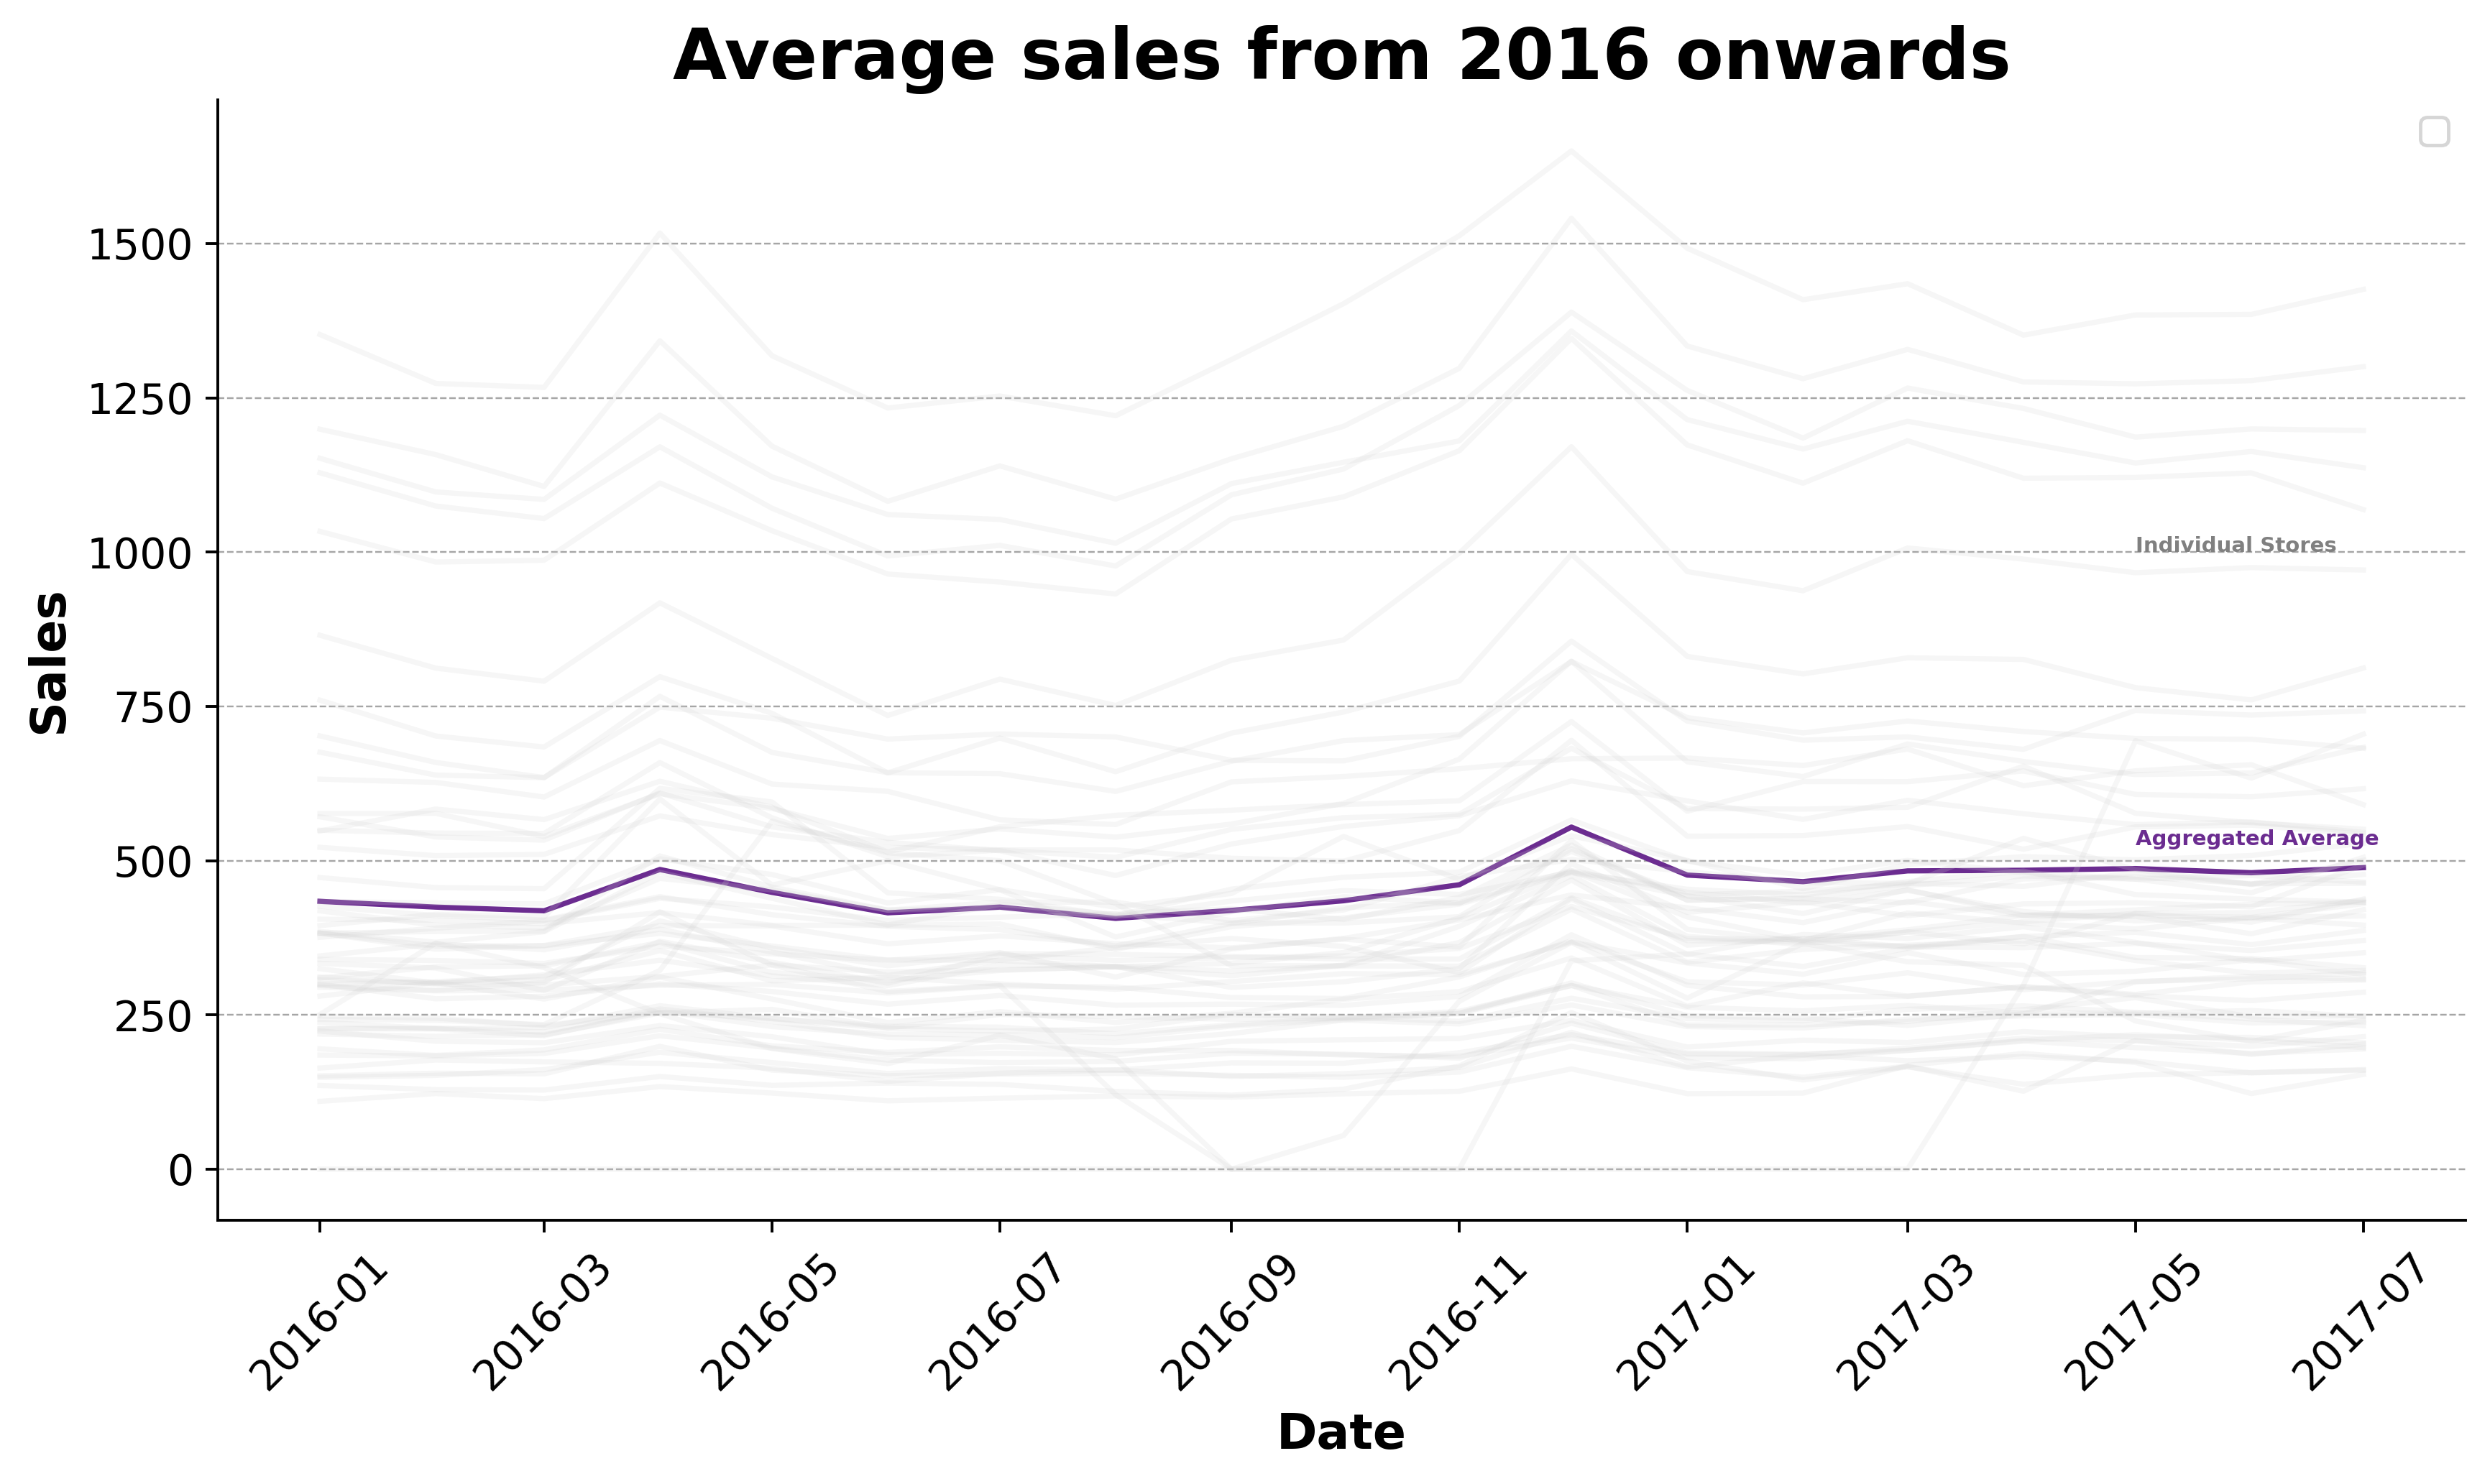

In [7]:
# grouping by each month again (don't want to run all code each time) and plotting the average sales by store
data['year'] = pd.to_datetime(data['date']).dt.year
data['month'] = pd.to_datetime(data['date']).dt.month

data['year_month'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))

monthly_sales = data.groupby('year_month')['sales'].mean().reset_index()

monthly_store_sales = data.groupby(['year_month', 'store_nbr'])['sales'].mean().reset_index()


plt.figure(figsize=(10, 6), dpi = 350)
sns.lineplot(x='year_month', y='sales', data=monthly_sales, color='#6b2c90') 

for store in data['store_nbr'].unique():
    store_sales = data[data['store_nbr'] == store].groupby('year_month')['sales'].mean().reset_index()
    sns.lineplot(x='year_month', y='sales', data=store_sales, color="lightgrey", alpha=0.2)
sns.despine()


plt.title('Average sales from 2016 onwards', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Sales', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='light', rotation=45)
plt.yticks(fontsize=12, fontweight='light')


plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='y', alpha=0.7, zorder=0)  
plt.ticklabel_format(style='plain', axis='y')

plt.gca().set_axisbelow(True)
spine_linewidth = 0.5  

date_for_aggregated = pd.to_datetime('2017-05-01')
date_for_individual = pd.to_datetime('2017-05-01')

plt.text(date_for_aggregated, 525, 'Aggregated Average', fontsize=6, color='#6b2c90', fontweight='bold')
plt.text(date_for_individual, 1000, 'Individual Stores', fontsize=6, color='grey', fontweight='bold') 

plt.tight_layout()
plt.legend()
plt.show()



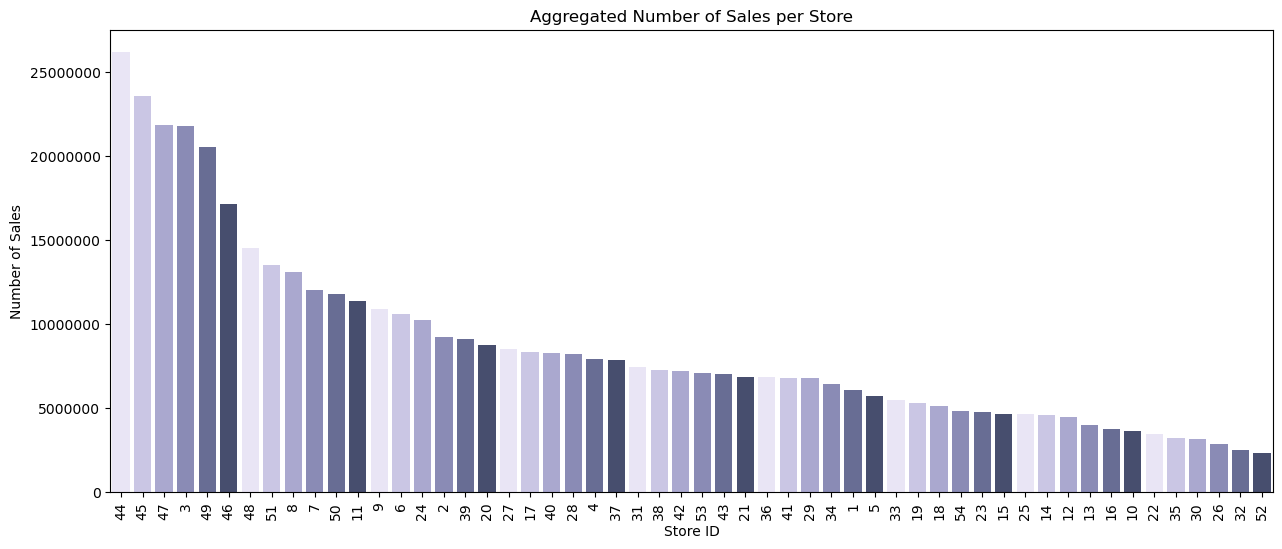

In [8]:
# sales data per store as a sum
sales_per_store = data.groupby('store_nbr')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(y='sales', x='store_nbr', data=sales_per_store, palette=sns.cubehelix_palette(start=2.8, rot=.1, light=0.9, dark=0.3), order=sales_per_store['store_nbr'])

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  
plt.title('Aggregated Number of Sales per Store')
plt.xlabel('Store ID')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)  

plt.show()



In [9]:
# Feature importances for each split
feature_importances = [
    {
        'Split': 'Split 1',
        'store_nbr': 0.10652967252871755,
        'product_type': 0.4073127813526262,
        'special_offer': 0.03177452485644575,
        'day_of_week': 0.038689312094480566,
        'month': 0.006517638987198445,
        'day_of_month': 0.025338314226337293,
        'sales_lag_7': 0.2652841624970343,
        'rolling_window_7_std': 0.06171093177854522,
        'rolling_window_7_skew': 0.018217647537513204
    },
    {
        'Split': 'Split 2',
        'store_nbr': 0.10229555955833491,
        'product_type': 0.3780276997708219,
        'special_offer': 0.04879589472478799,
        'day_of_week': 0.04449810165319904,
        'month': 0.020315096903714358,
        'day_of_month': 0.04053901177959877,
        'sales_lag_7': 0.2701835143438776,
        'rolling_window_7_std': 0.09044975914343793,
        'rolling_window_7_skew': 0.01653874069077003
    },
    {
        'Split': 'Split 3',
        'store_nbr': 0.09129653257010077,
        'product_type': 0.3725602236307835,
        'special_offer': 0.040319240572651315,
        'day_of_week': 0.052398727698384086,
        'month': 0.008688100967530995,
        'day_of_month': 0.029352830772043387,
        'sales_lag_7': 0.2754456180679966,
        'rolling_window_7_std': 0.07315700077383558,
        'rolling_window_7_skew': 0.014307428273589365
    }
]

df_feature_importances = pd.DataFrame(feature_importances)
df_feature_importances = df_feature_importances.melt(id_vars='Split', var_name='Feature', value_name='Permutation Importance')



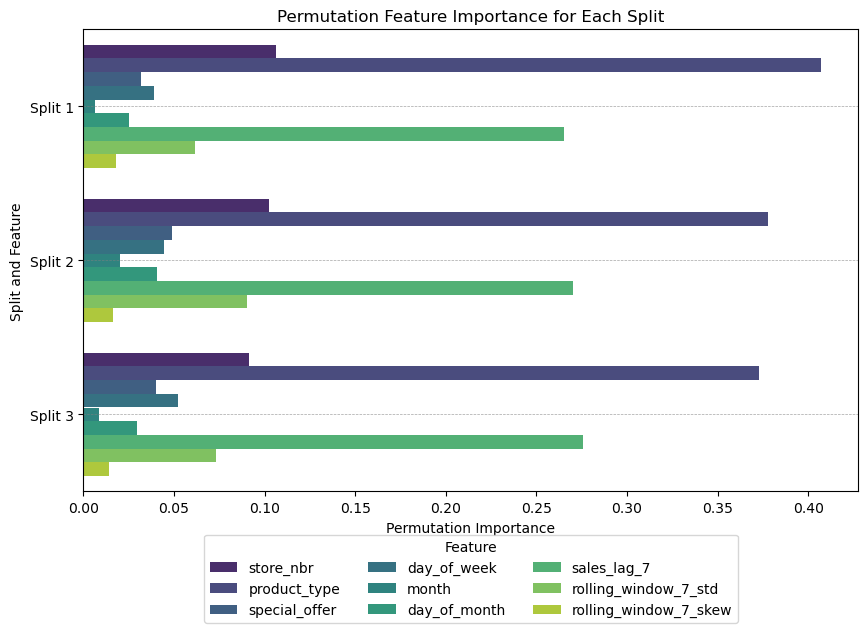

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_feature_importances, x='Permutation Importance', y='Split', hue='Feature', palette='viridis')
plt.title('Permutation Feature Importance for Each Split')
plt.ylabel('Split and Feature')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, title='Feature')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='y', alpha=0.7, zorder=0)  
plt.show()

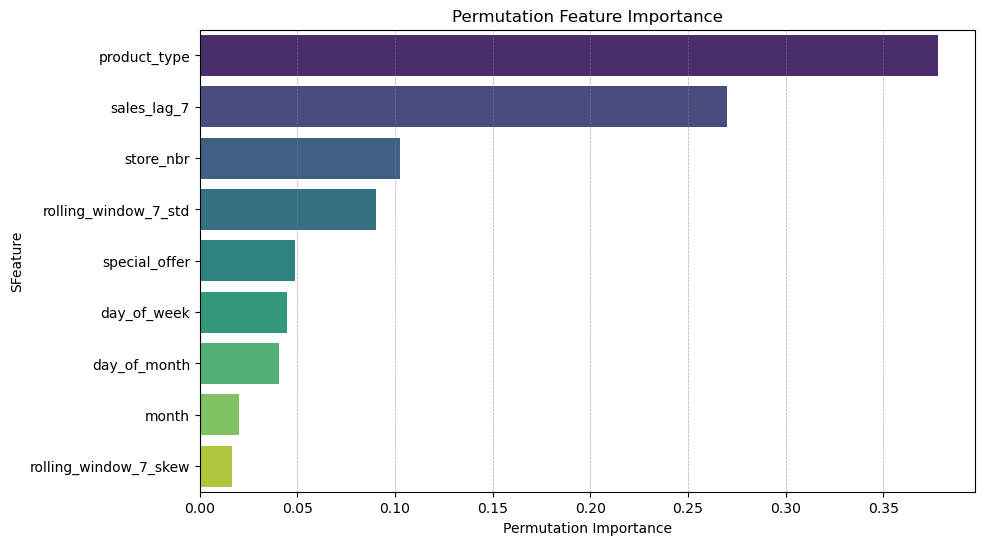

In [11]:
import matplotlib.pyplot as plt

# Updated Permutation Feature Importance values
feature_importances = {
    'store_nbr': 0.10229555955833491,
    'product_type': 0.3780276997708219,
    'special_offer': 0.04879589472478799,
    'day_of_week': 0.04449810165319904,
    'month': 0.020315096903714358,
    'day_of_month': 0.04053901177959877,
    'sales_lag_7': 0.2701835143438776,
    'rolling_window_7_std': 0.09044975914343793,
    'rolling_window_7_skew': 0.01653874069077003
}

sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

df = pd.DataFrame(sorted_feature_importances.items(), columns=['Feature', 'Permutation Importance'])


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Permutation Importance', y='Feature', palette='viridis')
plt.title('Permutation Feature Importance')
plt.ylabel('SFeature')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='x', alpha=0.7, zorder=0)  
plt.show()

In [12]:
# time it takes to run each split from a different notebook
Time_difference = [
    {
        'Model': 'Hist-based Gradient Boosting Regressor',
        'Time To Run': 1.76,
    },
    {
        'Model': 'Random Forest Regressor',
        'Time To Run': 57.84,
    }]
df_time_difference = pd.DataFrame(Time_difference)


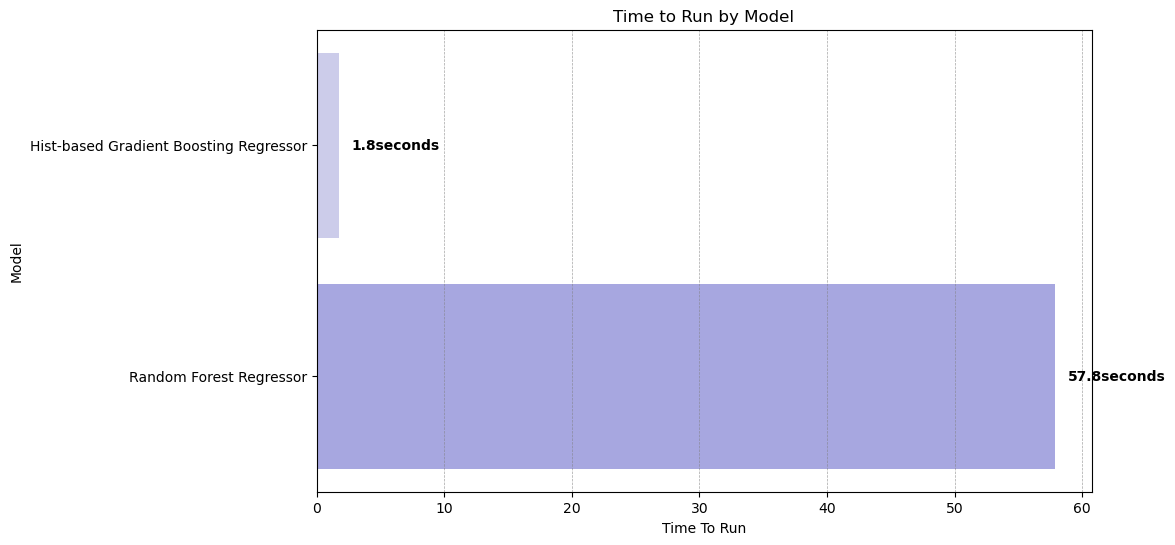

In [13]:
plt.figure(figsize=(10, 6))
custom_palette = ["#c7c7ef", "#9d9dea"]
barplot = sns.barplot(data=df_time_difference, x='Time To Run', y='Model', palette=custom_palette)
plt.title('Time to Run by Model')
plt.xlabel('Time To Run')
plt.ylabel('Model')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='x', alpha=0.7, zorder=0)

for p in barplot.patches:
    percentage_value = f'{p.get_width():.1f}seconds'
    x_position = p.get_x() + p.get_width() + 1  
    y_position = p.get_y() + p.get_height() / 2
    barplot.annotate(percentage_value, (x_position, y_position), ha='left', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()



In [14]:
feature_importances = [
    {
        'Split': 'Split 1',
        'Random Forest': 240.61047318405298,
        'Hist-based Gradient Boosting Regressor': 224.87344041605573,
    },
    {
        'Split': 'Split 2',
        'Random Forest': 407.3698610967872,
        'Hist-based Gradient Boosting Regressor': 381.03452024251425,
    },
    {
        'Split': 'Split 3',
        'Random Forest': 286.88686833886374,
        'Hist-based Gradient Boosting Regressor': 296.29845318604595,
    }
]

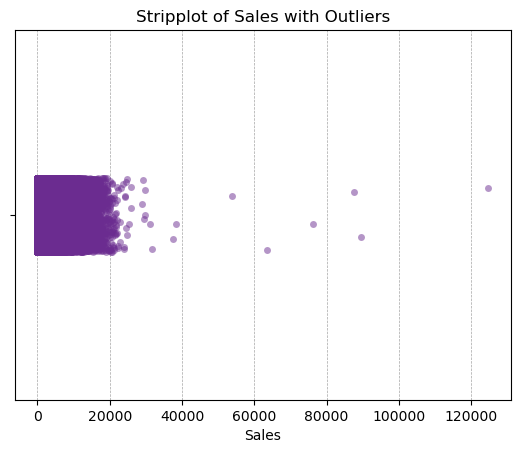

In [15]:
# just a stripplot
sns.stripplot(x='sales', data=data, jitter=True, color='#6b2c90', marker='o', alpha = 0.5)

plt.title('Stripplot of Sales with Outliers')
plt.xlabel('Sales')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='x', alpha=0.7, zorder=0)


plt.show()


/var/folders/l4/zzypv4g962z9znwm8cxmhf5h0000gn/T/ipykernel_37613/3736037544.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sales', y='product_type', data=sales_by_product, estimator=sum, ci=None, palette='viridis')


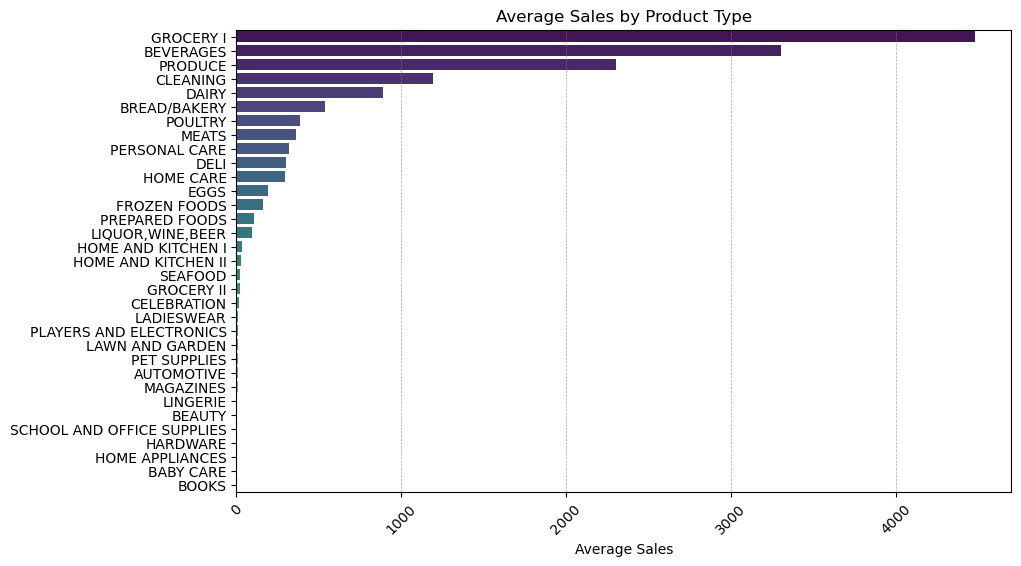

In [16]:
# most grossing products
plt.figure(figsize=(10, 6))
sales_by_product = data.groupby('product_type')['sales'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='sales', y='product_type', data=sales_by_product, estimator=sum, ci=None, palette='viridis')
plt.title('Average Sales by Product Type')
plt.xlabel('Average Sales')
plt.ylabel('')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='x', alpha=0.7, zorder=0)  

plt.gca().get_xaxis().get_major_formatter().set_scientific(False) 
plt.show()


/var/folders/l4/zzypv4g962z9znwm8cxmhf5h0000gn/T/ipykernel_37613/2650108117.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sales', y='product_type', data=top_5_sales_by_product, estimator=sum, ci=None, palette='viridis')


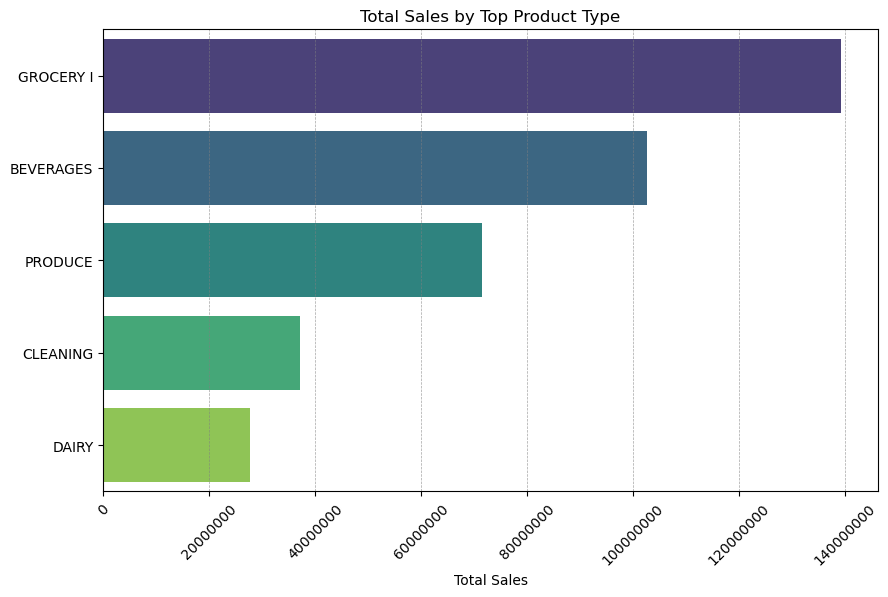

In [17]:
# same as above but top 5 for report
plt.figure(figsize=(10, 6))
sales_by_product = data.groupby('product_type')['sales'].sum().sort_values(ascending=False).reset_index()
top_5_sales_by_product = sales_by_product.head(5)
sns.barplot(x='sales', y='product_type', data=top_5_sales_by_product, estimator=sum, ci=None, palette='viridis')

plt.title('Total Sales by Top Product Type')
plt.xlabel('Total Sales')
plt.ylabel('')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='x', alpha=0.7, zorder=0) 
plt.gca().get_xaxis().get_major_formatter().set_scientific(False) 



In [18]:
# RMSE for folds dataset
RMSE_folds = [
    {
        'Fold': 'Fold 1',
        'Model 1': 235.81750156953618,
        'Model 2': 137.01559312463607,
    },
    {
        'Fold': 'Fold 2',
        'Model 1': 436.1347069204234,
        'Model 2': 177.81622848829707,
    },
    {
        'Fold': 'Fold 3',
        'Model 1' : 342.60561933542044,
        'Model 2': 177.49894497233535,
    }
]

RMSE_folds = pd.DataFrame(RMSE_folds)
RMSE_folds = RMSE_folds.melt(id_vars='Fold', value_vars=['Model 1', 'Model 2'], var_name='model', value_name='RMSE')
RMSE_folds

,Fold,model,RMSE
0,Fold 1,Model 1,235.817502
1,Fold 2,Model 1,436.134707
2,Fold 3,Model 1,342.605619
3,Fold 1,Model 2,137.015593
4,Fold 2,Model 2,177.816228
5,Fold 3,Model 2,177.498945


In [19]:
# RMSE for folds dataset but only for Model 1
RMSE_folds = [
    {
        'Fold': 'Fold 1',
        'RMSE': 235.81750156953618,
    },
    {
        'Fold': 'Fold 2',
        'RMSE': 436.1347069204234,
    },
    {
        'Fold': 'Fold 3',
        'RMSE' : 342.60561933542044,
    }
]

RMSE_folds = pd.DataFrame(RMSE_folds)
RMSE_folds

,Fold,RMSE
0,Fold 1,235.817502
1,Fold 2,436.134707
2,Fold 3,342.605619


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 450.0)

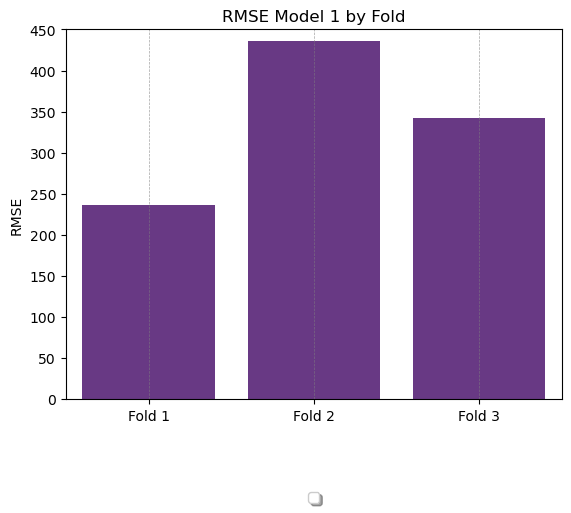

In [20]:
sns.barplot(x = 'Fold', y ='RMSE', data = RMSE_folds, estimator=sum, color = "#6b2c90")
plt.title('RMSE Model 1 by Fold')
plt.xlabel('')
plt.ylabel('RMSE')
plt.yticks(ticks=range(0, 500, 50))
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='x', alpha=0.7, zorder=0) 
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=2)
plt.ylim(0, 450)



In [21]:
# not sure why I am doing this 
data.reset_index(inplace=True)
data['date'] = pd.to_datetime(data['date'])

In [22]:
# removing outliers metric and why it is infeasible
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
IQR = Q3 - Q1

filter = (data['sales'] <= Q3 + 1.5 *IQR)
outliers = data.loc[~filter]
data = data.loc[filter]

outliers



,index,id,date,store_nbr,product_type,sales,special_offer,year,month,year_month
564,1946508,1946508,2016-01-01,25,BEVERAGES,5104.000,1,2016,1,2016-01-01
566,1946510,1946510,2016-01-01,25,BREAD/BAKERY,680.952,0,2016,1,2016-01-01
568,1946512,1946512,2016-01-01,25,CLEANING,734.000,0,2016,1,2016-01-01
569,1946513,1946513,2016-01-01,25,DAIRY,1033.000,11,2016,1,2016-01-01
573,1946517,1946517,2016-01-01,25,GROCERY I,3247.000,4,2016,1,2016-01-01
...,...,...,...,...,...,...,...,...,...,...
1026404,2972348,2972348,2017-07-30,9,BREAD/BAKERY,684.000,76,2017,7,2017-07-01
1026406,2972350,2972350,2017-07-30,9,CLEANING,2051.000,23,2017,7,2017-07-01
1026407,2972351,2972351,2017-07-30,9,DAIRY,1049.000,6,2017,7,2017-07-01
1026411,2972355,2972355,2017-07-30,9,GROCERY I,8069.242,72,2017,7,2017-07-01


# END OF FILE